In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import mplcyberpunk
import os,sys
import pandas as pd
from scipy.stats.kde import gaussian_kde as kde
## Importing the accompanying utility and analysis files
## point to my utils/analysis code
hbpmloc = '/mnt/c/Users/Alexander/Documents/LIGO/PM/HAYstack/'
sys.path.append(os.path.abspath(hbpmloc+'hbpm_utils/'))
from hbpm_utils import *
from importlib import reload
reload(sys.modules["hbpm_utils"])
from hbpm_utils import *
sys.path.append(hbpmloc)
from hbpm_analysis import run_analysis
reload(sys.modules["hbpm_analysis"])
from hbpm_analysis import run_analysis

## my preferred figure settings
matplotlib.rcParams['figure.figsize'] = (8.08, 5.)
matplotlib.rcParams['xtick.labelsize'] = 12.0
matplotlib.rcParams['ytick.labelsize'] = 12.0
matplotlib.rcParams['axes.labelsize'] = 14.0
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.titlesize'] = 16
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["mediumorchid", "teal", "goldenrod","slategray"])

## Uniform Prior

In [4]:
## set up lists for each configuration option
top = './paper_data/monte_carlo_data/all_distance_distributions/'
# runs = ['O4','O5','O4O5','Aplus4yr']
runs = ['O4O5','Aplus4yr']
eoss = ['sly4','sfhx','dd2']
categories = ['null','post']

In [5]:
## build dict
validation_dict = {}
for run in runs:
    validation_dict[run] = {}
    validation_dict[run]['null'] = pd.read_csv(top+run+'_null_validation.csv',header=0)
    ## A+ 4yr only has SFHX.
    if run!='Aplus4yr':
        eos_sublist = eoss
    else:
        eos_sublist = ['sfhx']
    for eos in eos_sublist:
        if run!='Aplus4yr':
            eospathname = eos
        else:
            eospathname = ''
        validation_dict[run][eos] = pd.read_csv(top+eospathname+run+'_post_validation.csv',header=0)

In [6]:
for run in runs:
    null_CI_vals = validation_dict[run]['null']['null_CI'].to_numpy()
    print(run)
    print(null_CI_vals.min(),null_CI_vals.max())

O4O5
5.155778894472361 5.849246231155781
Aplus4yr
4.0402010050251205 5.879396984924621


95\% Confidence Interval Version

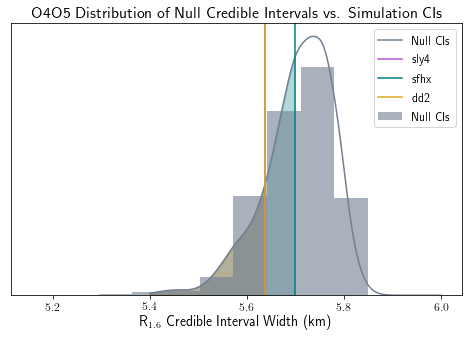

In [7]:
## C.I. version
for run in ['O4O5']:
    null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 5.4
    upper=6
    Npoints = 100
    CI_xs = np.linspace(lower,upper,Npoints)
    CI_maxi = np.argmax(null_CI_dist(CI_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
    plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
    plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
        fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
        plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
    plt.gca().set_yticks([])
    plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
    plt.legend()
    # plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
    plt.show()

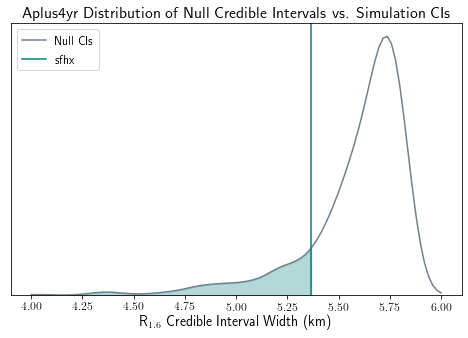

In [8]:
## C.I. version - A+
run = 'Aplus4yr'
null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
colors=['mediumorchid','teal','goldenrod']
lower = 4
upper=6
Npoints = 100
CI_xs = np.linspace(lower,upper,Npoints)
CI_maxi = np.argmax(null_CI_dist(CI_xs))
plt.figure()
plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
# plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
# for eos,color in zip(eoss,colors):
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
plt.legend()
# plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
plt.show()

Wasserstein Distance Version

In [9]:
for run in runs:
    null_WD_vals = validation_dict[run]['null']['null_WD'].to_numpy()
    print(run)
    print(null_WD_vals.min(),null_WD_vals.max())

O4O5
0.725021826935467 1.5791959401899498
Aplus4yr
0.0666504104648328 1.8006256992325402


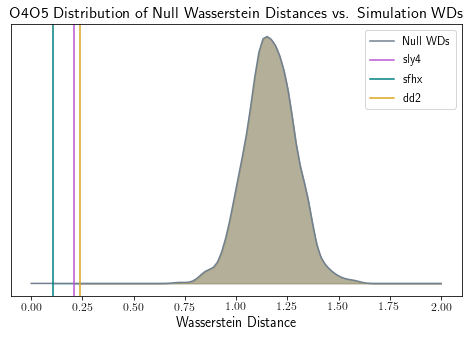

In [10]:
## O4/O5/O4O5 WD version
for run in ['O4O5']:
    null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 0
    upper = 2
    Npoints = 100
    WD_xs = np.linspace(lower,upper,Npoints)
    WD_maxi = np.argmax(null_WD_dist(WD_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
    plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['dd2_WD'][0],label=eos,color=color)
        fill_xs = np.linspace(validation_dict[run][eos]['dd2_WD'][0],upper,Npoints)
        plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
#     plt.ylim(0,)
    plt.gca().set_yticks([])
    plt.xlabel('Wasserstein Distance')
    plt.legend()
    # plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
    plt.show()

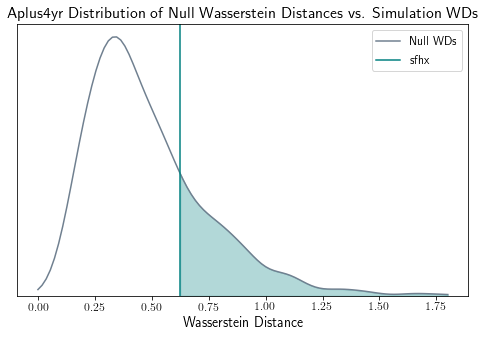

In [11]:
## O4/O5/O4O5 WD version
run = 'Aplus4yr'
null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
colors=['mediumorchid','teal','goldenrod']
lower = 0
upper = 1.8
Npoints = 100
WD_xs = np.linspace(lower,upper,Npoints)
WD_maxi = np.argmax(null_WD_dist(WD_xs))
plt.figure()
plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['dd2_WD'][0],label=eos,color=color)
fill_xs = np.linspace(validation_dict[run][eos]['dd2_WD'][0],upper,Npoints)
plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('Wasserstein Distance')
plt.legend()
# plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
plt.show()

## Multimessenger Prior

In [12]:
## set up lists for each configuration option
top = './paper_data/monte_carlo_data/all_distance_distributions/'
runs = ['O4O5','Aplus4yr']
eoss = ['sly4','sfhx','dd2']
categories = ['null','post']

In [13]:
## build dict
validation_dict = {}
for run in runs:
    ## A+ 4yr only has SFHX & does not have an EoS prefix
    if run!='Aplus4yr':
        eos_sublist = eoss
        eos_nulllist = eoss
    else:
        eos_sublist = ['sfhx']
        eos_nulllist = ['']
    validation_dict[run] = {}
    for eos,name in zip(eos_sublist,eos_nulllist):
        validation_dict[run]['null'] = pd.read_csv(top+run+'_multimessenger_null_validation.csv',header=0)
        validation_dict[run][eos] = pd.read_csv(top+name+run+'_multimessenger_post_validation.csv',header=0)

In [14]:
for run in runs:
    null_CI_vals = validation_dict[run]['null']['null_CI'].to_numpy()
    print(run)
    print(null_CI_vals.min(),null_CI_vals.max())

O4O5
1.2964824120603 2.17085427135678
Aplus4yr
0.9346733668341701 2.3819095477386902


95\% Confidence Interval Version

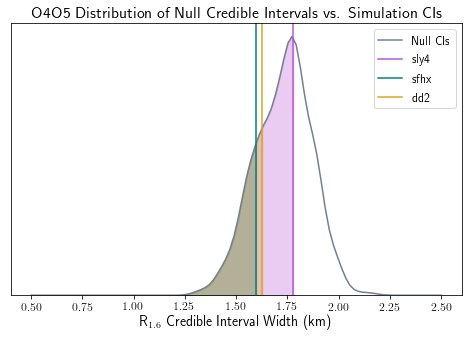

In [15]:
## C.I. version
for run in ['O4O5']:
    null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 0.5
    upper=2.5
    Npoints = 100
    CI_xs = np.linspace(lower,upper,Npoints)
    CI_maxi = np.argmax(null_CI_dist(CI_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
#     plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
    plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
        fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
        plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
#     plt.xlim(1.5,3)
    plt.gca().set_yticks([])
    plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
    plt.legend()
    # plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
    plt.show()

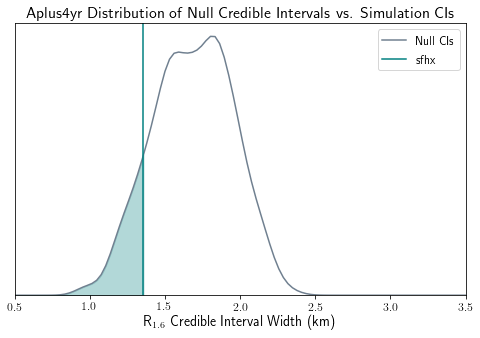

In [16]:
## C.I. version - A+
run = 'Aplus4yr'
null_CI_dist = kde(validation_dict[run]['null']['null_CI'])
colors=['mediumorchid','teal','goldenrod']
lower = 0.5
upper = 3.5
Npoints = 100
CI_xs = np.linspace(lower,upper,Npoints)
CI_maxi = np.argmax(null_CI_dist(CI_xs))
plt.figure()
plt.title(run+' Distribution of Null Credible Intervals vs. Simulation CIs')
# plt.hist(validation_dict[run]['null']['null_CI'],density=True,color='slategray',alpha=0.6,label='Null CIs')
plt.plot(CI_xs,null_CI_dist.pdf(CI_xs),color='slategray',label='Null CIs')
# for eos,color in zip(eoss,colors):
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['post_CI'][0],label=eos,color=color)
fill_xs = np.linspace(lower,validation_dict[run][eos]['post_CI'][0],Npoints)
plt.fill_between(fill_xs,null_CI_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.xlim(lower,upper)
plt.gca().set_yticks([])
plt.xlabel('R$_{1.6}$ Credible Interval Width (km)')
plt.legend()
# plt.savefig('../paper/figures/CI_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/CI_distribution.pdf',bbox_inches='tight')
plt.show()

Wasserstein Distance Version

In [17]:
for run in runs:
    null_WD_vals = validation_dict[run]['null']['null_WD'].to_numpy()
    print(run)
    print(null_WD_vals.min(),null_WD_vals.max())

O4O5
0.00653352998711066 0.270998094157398
Aplus4yr
0.0136957780205841 0.531027724764286


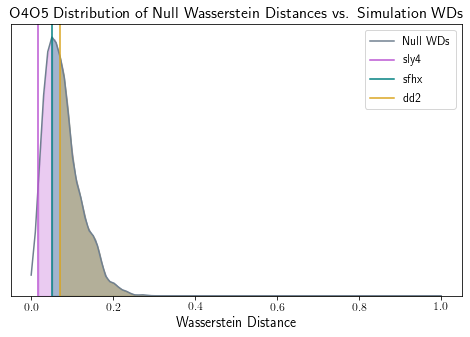

In [18]:
## O4/O5/O4O5 WD version
for run in ['O4O5']:
    null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
    colors=['mediumorchid','teal','goldenrod']
    lower = 0
    upper = 1
    Npoints = 100
    WD_xs = np.linspace(lower,upper,Npoints)
    WD_maxi = np.argmax(null_WD_dist(WD_xs))
    plt.figure()
    plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
    plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    for eos,color in zip(eoss,colors):
        plt.axvline(validation_dict[run][eos]['dd2_WD'][0],label=eos,color=color)
        fill_xs = np.linspace(validation_dict[run][eos]['dd2_WD'][0],upper,Npoints)
        plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
    plt.ylim(0,)
    plt.gca().set_yticks([])
    plt.xlabel('Wasserstein Distance')
    plt.legend()
    # plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
    # plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
    plt.show()

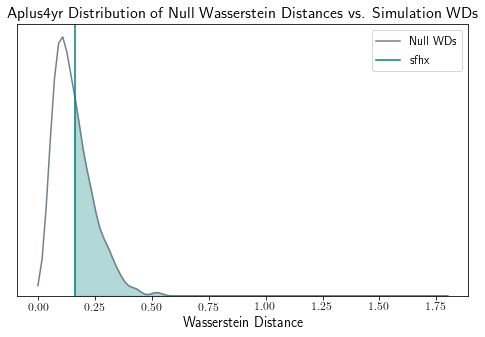

In [19]:
## O4/O5/O4O5 WD version
run = 'Aplus4yr'
null_WD_dist = kde(validation_dict[run]['null']['null_WD'])
colors=['mediumorchid','teal','goldenrod']
lower = 0
upper = 1.8
Npoints = 100
WD_xs = np.linspace(lower,upper,Npoints)
WD_maxi = np.argmax(null_WD_dist(WD_xs))
plt.figure()
plt.title(run+' Distribution of Null Wasserstein Distances vs. Simulation WDs')
#     plt.hist(validation_dict[run]['null']['null_WD'],density=True,color='slategray',alpha=0.6,label='Null WDs')
plt.plot(WD_xs,null_WD_dist.pdf(WD_xs),color='slategray',label='Null WDs')
#     for eos,color in zip(eoss,colors):
#         plt.axvline(validation_dict[run][eos]['post_WD'][0],label=eos,color=color)
#         fill_xs = np.linspace(lower,validation_dict[run][eos]['post_WD'][0],Npoints)
#         plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
eos = 'sfhx'
color = colors[1]
plt.axvline(validation_dict[run][eos]['dd2_WD'][0],label=eos,color=color)
fill_xs = np.linspace(validation_dict[run][eos]['dd2_WD'][0],upper,Npoints)
plt.fill_between(fill_xs,null_WD_dist.pdf(fill_xs),color=color,label='__nolegend__',alpha=0.3)
plt.ylim(0,)
plt.gca().set_yticks([])
plt.xlabel('Wasserstein Distance')
plt.legend()
# plt.savefig('../paper/figures/WD_distribution.png',bbox_inches='tight')
# plt.savefig('../paper/figures/WD_distribution.pdf',bbox_inches='tight')
plt.show()

## Get all the p-values

In [20]:
## set up lists for each configuration option
top = './paper_data/monte_carlo_data/all_distance_distributions/'
# runs = ['O4','O5','O4O5','Aplus4yr']
runs = ['O4O5','Aplus4yr']
eoss = ['sly4','sfhx','dd2']
priors = ['uniform','multimessenger']
categories = ['CI','WD']
subcats = ['val','p']

In [21]:
## build dict
pval_dict = {}
for prior in priors:
    pval_dict[prior] = {}
    if prior=='uniform':
        priorname = ''
    else:
        priorname = '_'+prior
    for run in runs:
        pval_dict[prior][run] = {}
        ## A+ 4yr only has SFHX.
        if run!='Aplus4yr':
            eos_sublist = eoss
        else:
            eos_sublist = ['sfhx']
        for eos in eos_sublist:
            if run!='Aplus4yr':
                eospathname = eos
            else:
                eospathname = ''
            pval_dict[prior][run][eos] = {}
            pval_dict[prior][run][eos]['CI'] = {}
            pval_dict[prior][run][eos]['WD'] = {}
            vals_i =  pd.read_csv(top+eospathname+run+priorname+'_post_validation.csv',header=0).to_numpy()[0]
            ps_i = pd.read_csv(top+eospathname+run+priorname+'_p_values.csv',header=0).to_numpy()[0]
            pval_dict[prior][run][eos]['CI']['val'] = vals_i[0]
            pval_dict[prior][run][eos]['CI']['p'] = ps_i[0]
            pval_dict[prior][run][eos]['WD']['val'] = vals_i[1]
            pval_dict[prior][run][eos]['WD']['p'] = ps_i[1]

In [22]:
## function spit out table lines
def make_p_table(pdict,prior):
    names = {'dd2':'DD2','sfhx':'SFHX','sly4':'SLy4'}
    print('Run & EoS & WD & p (WD) & CI95 & p (CI95) \\')
    for eos in pdict[prior]['O4O5'].keys():
        base_i = pdict[prior]['O4O5'][eos]
        name_i = names[eos]
        print('O4+O5 & '+name_i+' & {:0.2f} & {:0.2f} & {:0.2f} km & {:0.2f} \\'.format(base_i['WD']['val'],
                                                                          base_i['WD']['p'],
                                                                          base_i['CI']['val'],
                                                                          base_i['CI']['p']))
    base_j = pdict[prior]['Aplus4yr']['sfhx']
    print('A+ 4yr & SFHX & {:0.2f} & {:0.2f} & {:0.2f} km & {:0.2f} \\'.format(base_j['WD']['val'],
                                                                      base_j['WD']['p'],
                                                                      base_j['CI']['val'],
                                                                      base_j['CI']['p']))

In [23]:
make_p_table(pval_dict,'uniform')

Run & EoS & WD & p (WD) & CI95 & p (CI95) \
O4+O5 & SLy4 & 0.21 & 0.48 & 5.64 km & 0.17 \
O4+O5 & SFHX & 0.10 & 0.88 & 5.70 km & 0.42 \
O4+O5 & DD2 & 0.24 & 0.38 & 5.64 km & 0.17 \
A+ 4yr & SFHX & 0.62 & 0.23 & 5.37 km & 0.14 \


In [24]:
make_p_table(pval_dict,'multimessenger')

Run & EoS & WD & p (WD) & CI95 & p (CI95) \
O4+O5 & SLy4 & 0.02 & 0.97 & 1.78 km & 0.67 \
O4+O5 & SFHX & 0.05 & 0.68 & 1.60 km & 0.20 \
O4+O5 & DD2 & 0.07 & 0.49 & 1.63 km & 0.24 \
A+ 4yr & SFHX & 0.16 & 0.40 & 1.36 km & 0.12 \
